## Convex Optimization - Support Vector Machines - Tutorial 5 

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

np.random.seed(1)

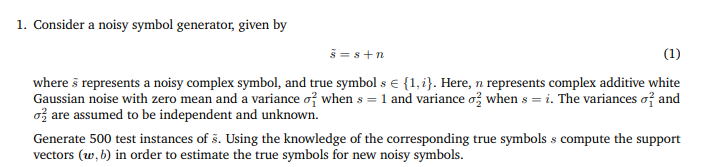

In [95]:
def add_noisy(signal_value, sigma1, sigma2):
    if signal_value == 1:
        return np.random.normal(0, sigma1) + 1j*np.random.normal(0, sigma1) + signal_value
    
    return np.random.normal(0, sigma2) + 1j*np.random.normal(0, sigma2) + signal_value

In [96]:
s_array = np.random.choice([1, 1j],500)

s_real_array_mask = (s_array == 1)

sigma1 = 0.4
sigma2 = 0.3

add_noisy_vectorized = np.vectorize(add_noisy)

s_noisy_array = add_noisy_vectorized(s_array, sigma1, sigma2)

s_noisy_gen_from_real_s = s_noisy_array[s_real_array_mask]
s_noisy_gen_from_imag_s = s_noisy_array[~s_real_array_mask]

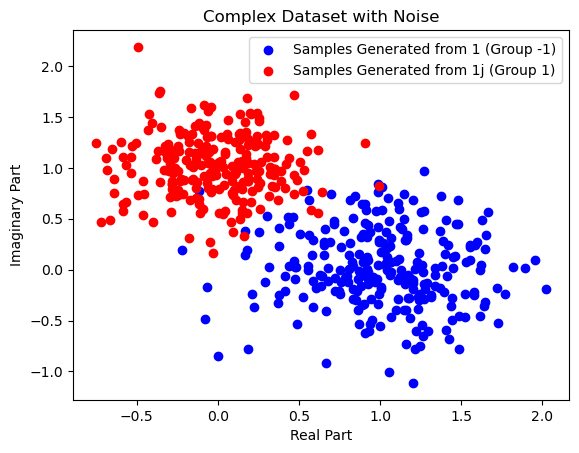

In [97]:
plt.scatter(s_noisy_gen_from_real_s.real, s_noisy_gen_from_real_s.imag, color="blue", label="Samples Generated from 1 (Group -1)")
plt.scatter(s_noisy_gen_from_imag_s.real, s_noisy_gen_from_imag_s.imag, color="red", label="Samples Generated from 1j (Group 1)")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.title("Complex Dataset with Noise")
plt.show()

In [108]:
data = np.concatenate([s_noisy_array.real.reshape(500, 1), s_noisy_array.imag.reshape(500, 1)], axis=1)
labels = (~s_real_array_mask).astype(int)
labels = 2*labels - 1

In [129]:
w = cvx.Variable(2)
b = cvx.Variable(1)

objective = cvx.Minimize(cvx.sum_squares(w))

constraints = [cvx.diag(labels.T @ (data @ w + b)) >= 1]

prob = cvx.Problem(objective, constraints)

print("Optimal value", prob.solve())
print("Optimal var:")
print(w.value)
print(b.value)

Optimal value 2.980422987912096e-19
Optimal var:
[ 3.97824085e-10 -3.73869357e-10]
[-0.13333096]


In [115]:
point1 = np.array([0, b.value[0]])
w_array = np.array(w.value)
w_array = w_array / np.linalg.norm(w_array)
point2 = (np.array([[0, -1], [1, 0]]) @ w_array) + point1

support_line_data = np.concatenate([point1.reshape(2,1), point2.reshape(2, 1)], axis=1)

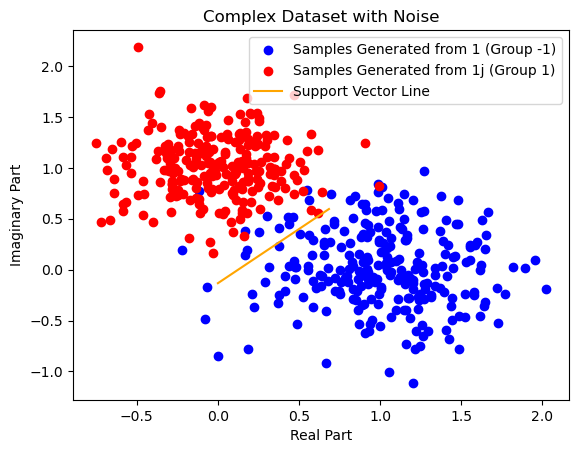

In [116]:
plt.scatter(s_noisy_gen_from_real_s.real, s_noisy_gen_from_real_s.imag, color="blue", label="Samples Generated from 1 (Group -1)")
plt.scatter(s_noisy_gen_from_imag_s.real, s_noisy_gen_from_imag_s.imag, color="red", label="Samples Generated from 1j (Group 1)")
plt.plot(support_line_data[0], support_line_data[1], color="orange", label="Support Vector Line")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.title("Complex Dataset with Noise")
plt.show()

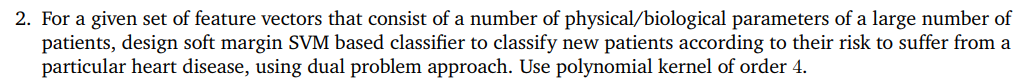